In [1]:
import tensorflow as tf
import numpy as np
import sys
sys.path.append('../')
import utils.preprocess as preprocess

In [2]:
pre = preprocess.preprocess("D:/DataSet/CICIDS2017/CSV/Wednesday-workingHours.pcap_ISCX.csv", labelColumnName='Label')
X_train, X_test, y_train, y_test = pre.preprocessing()

In [3]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [4]:
import utils.network.network3 as model
from utils.metrics import metric

In [5]:
net = model.MyLstmModel()

In [6]:
algorithm = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, momentum=0.89, epsilon=1e-07, centered=False, name='RMSprop')
net.compile(optimizer=algorithm, loss='categorical_crossentropy', metrics=metric())

In [7]:
from tensorflow.keras import callbacks
import datetime
logdir = os.path.join("../tensorboard", datetime.datetime.now().strftime("%Y%m%d-%H%M%S-network3-RMSprop"))
tensorboard_callback = callbacks.TensorBoard(logdir, histogram_freq=1)
# lrate = callbacks.LearningRateScheduler(opt_.exp_decay)

In [8]:
import numpy as np
model_ = net.fit(X_train, y_train, epochs=10, batch_size=512, validation_split=0.3, callbacks=[tensorboard_callback], verbose=1) # lrate

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

662/662 [==============================] - 12s 18ms/step - loss: 0.2154 - acc: 0.1450 - tp: 323848.0000 - fp: 50051.0000 - tn: 627525.0000 - fn: 14940.0000 - categorical_accuracy: 0.9175 - categorical_crossentropy: 0.2154 - precision: 0.8661 - recall: 0.9559 - auc: 0.9865 - val_loss: 0.0702 - val_acc: 0.2430 - val_tp: 141785.0000 - val_fp: 4205.0000 - val_tn: 286187.0000 - val_fn: 3411.0000 - val_categorical_accuracy: 0.9757 - val_categorical_crossentropy: 0.0702 - val_precision: 0.9712 - val

In [9]:
from utils.evl_metrics import confusion_matrix, eva_metric
y_pred = net.predict(X_test)
y_class = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)
confusion_matrix(y_label, y_class)
eva_metric(y_label, y_class)


TrueNegatives result:  128028.0
TruePositives result:  73779.0
FalseNegatives result:  1945.0
FalsePositives result:  3670.0
Recall result:  0.97431463
Precision result:  0.95261395


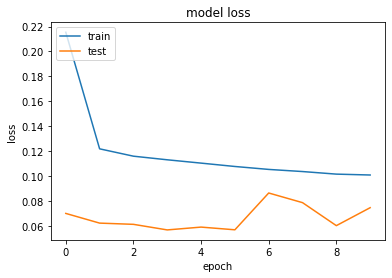

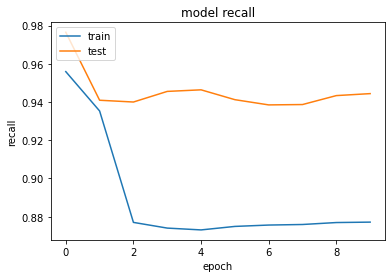

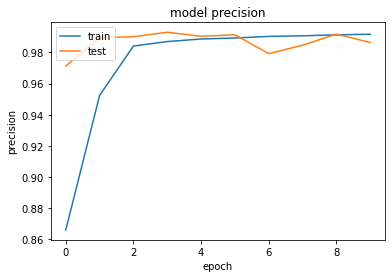

In [10]:
import utils.graph as fig
fig.loss_graph(model_)
fig.recall_graph(model_)
fig.precision_graph(model_)